In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import subprocess
import sys

# Path del binario del genético
binario = '../bin/genetic_trainer'

# Cosas que no tocaremos
n = 7
m = 6
c = 4
p = str(n*m*2)
generaciones = 300
cross = 'c:completo'
mut = 'm:multi'

# Cosas que tocaremos al final
p_mut = 0.1
pob = 10

# Para crear el comando que ejecuta el genético
def comando_genetico(fitness, seleccion):
    res = [binario] + [str(n)]+[str(m)]+[str(c)]+[str(p)]
    res = res+ [str(generaciones)] +[str(pob)]+[str(p_mut)]
    res = res+[fitness]+[seleccion]+[cross]+[mut]
    return res

# Para ejecutar subprocess en shell con stdout live
def shell(command):
    p = subprocess.Popen(command, stdout=subprocess.PIPE, bufsize=1)
    for line in iter(p.stdout.readline, b''):
        sys.stdout.write(line)
    p.stdout.close()
    p.wait()


# FITNESS:  vs golosos random
# SELECTION: probabilística


In [ ]:
fit = 'f:vs_golosos'
sel = 's:proba'
command = comando_genetico(fit,sel)

# Ejecuto el entrenamiento. En ./log/ me deja los .dat como logs.
shell(command)

# Leo los fitness, los formateo en lista
with open('log/best_fitness_log.dat') as file:
    lista = file.read().splitlines()
fitness = list(map(float, lista))

# Leo los progenitores, los formateo en lista 
with open('log/progenitores.dat') as file:
    lista = file.read().splitlines()
for i in range(len(lista)):
    lista[i] = lista[i].split(',')
    lista[i] = list(map(float, lista[i]))
progenitores = lista

# Leo el ganador
with open('log/ganador.dat') as file:
    lista = file.read().splitlines()
ganador_fitness = float(lista[0])
ganador_genoma = list(map(float, lista[1].split(',')))

# Guardo todo como una super tupla
np.save('save/genetico/log_vs_goloso_proba.npy',(fitness,progenitores,ganador_fitness,ganador_genoma))

In [ ]:
(fitness,progenitores,ganador_fitness,ganador_genoma) = np.load('save/genetico/log_vs_goloso_proba.npy')

plt.plot(fitness)
plt.xlabel('Generación')
plt.ylabel('Fitness')
plt.axhline(y=ganador_fitness, color='r', linestyle='-')
plt.savefig('plots/genetico/vs_goloso_proba.pdf',bbox_inches='tight')
plt.show()


plt.figure()
for i in range(len(progenitores[0])):
    plt.plot([genoma[i] for genoma in progenitores],label = 'id %s'%i)
    
plt.show()


# FITNESS:  vs randoms
# SELECTION: probabilística


In [ ]:
generaciones = 60
fit = 'f:vs_random'
sel = 's:proba'
command = comando_genetico(fit,sel)

# Ejecuto el entrenamiento. En ./log/ me deja los .dat como logs.
shell(command)

# Leo los fitness, los formateo en lista
with open('log/best_fitness_log.dat') as file:
    lista = file.read().splitlines()
fitness = list(map(float, lista))

# Leo los progenitores, los formateo en lista 
with open('log/progenitores.dat') as file:
    lista = file.read().splitlines()
for i in range(len(lista)):
    lista[i] = lista[i].split(',')
    lista[i] = list(map(float, lista[i]))
progenitores = lista

# Leo el ganador
with open('log/ganador.dat') as file:
    lista = file.read().splitlines()
ganador_fitness = float(lista[0])
ganador_genoma = list(map(float, lista[1].split(',')))

# Guardo todo como una super tupla
np.save('save/genetico/log_vs_random_proba.npy',(fitness,progenitores,ganador_fitness,ganador_genoma))

In [ ]:
(fitness,progenitores,ganador_fitness,ganador_genoma) = np.load('save/genetico/log_vs_random_proba.npy')

plt.plot(fitness)
plt.xlabel('Generación')
plt.ylabel('Fitness')
plt.axhline(y=ganador_fitness, color='r', linestyle='-')
plt.savefig('plots/genetico/vs_random_proba.pdf',bbox_inches='tight')
plt.show()


tops = [progenitores[i*2] for i in range(len(progenitores)//2)]


plt.figure()
plt.plot([genoma[1] for genoma in tops],label = '2')
plt.plot([genoma[2] for genoma in tops],label = '3')
plt.plot([genoma[3] for genoma in tops],label = '4')
plt.plot([genoma[4] for genoma in tops],label = '5')
plt.plot([genoma[5] for genoma in tops],label = '6')
plt.legend()

plt.figure()
plt.plot([genoma[6] for genoma in tops],label = '7')
plt.plot([genoma[7] for genoma in tops],label = '8')
plt.plot([genoma[8] for genoma in tops],label = '9')
plt.plot([genoma[9] for genoma in tops],label = '10')
plt.legend()

plt.show()


# FITNESS:  vs randoms
# SELECTION: por rank


In [ ]:
generaciones = 60

fit = 'f:vs_random'
sel = 's:rank'
command = comando_genetico(fit,sel)

# Ejecuto el entrenamiento. En ./log/ me deja los .dat como logs.
shell(command)

# Leo los fitness, los formateo en lista
with open('log/best_fitness_log.dat') as file:
    lista = file.read().splitlines()
fitness = list(map(float, lista))

# Leo los progenitores, los formateo en lista 
with open('log/progenitores.dat') as file:
    lista = file.read().splitlines()
for i in range(len(lista)):
    lista[i] = lista[i].split(',')
    lista[i] = list(map(float, lista[i]))
progenitores = lista

# Leo el ganador
with open('log/ganador.dat') as file:
    lista = file.read().splitlines()
ganador_fitness = float(lista[0])
ganador_genoma = list(map(float, lista[1].split(',')))

# Guardo todo como una super tupla
np.save('save/genetico/log_vs_random_rank.npy',(fitness,progenitores,ganador_fitness,ganador_genoma))

[3.0, -0.0, -41.0, -14.0, 25.0, 68.0, 95.0, 38.0, -8.0, -0.0]
0.9989


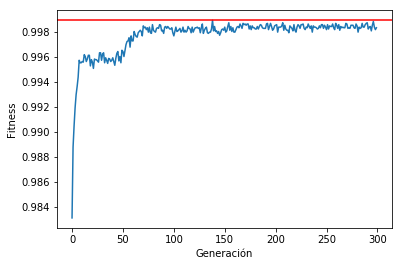

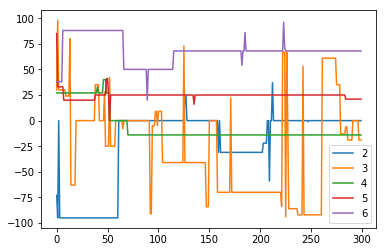

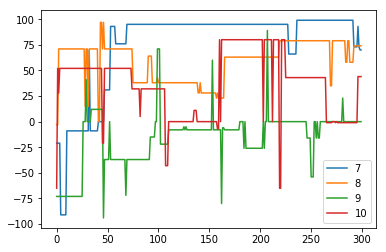

In [69]:
(fitness,progenitores,ganador_fitness,ganador_genoma) = np.load('save/genetico/log_vs_random_rank_300.npy')

print(ganador_genoma)
print(ganador_fitness)

plt.plot(fitness)
plt.xlabel('Generación')
plt.ylabel('Fitness')
plt.axhline(y=ganador_fitness, color='r', linestyle='-')
plt.savefig('plots/genetico/vs_random_rank.pdf',bbox_inches='tight')
plt.show()


tops = [progenitores[i*2] for i in range(len(progenitores)//2)]

plt.figure()
plt.plot([genoma[1] for genoma in tops],label = '2')
plt.plot([genoma[2] for genoma in tops],label = '3')
plt.plot([genoma[3] for genoma in tops],label = '4')
plt.plot([genoma[4] for genoma in tops],label = '5')
plt.plot([genoma[5] for genoma in tops],label = '6')
plt.legend()

plt.figure()
plt.plot([genoma[6] for genoma in tops],label = '7')
plt.plot([genoma[7] for genoma in tops],label = '8')
plt.plot([genoma[8] for genoma in tops],label = '9')
plt.plot([genoma[9] for genoma in tops],label = '10')
plt.legend()

plt.show()


# FITNESS:  vs golosos random
# SELECTION: rank


In [67]:
fit = 'f:vs_golosos'
sel = 's:rank'
command = comando_genetico(fit,sel)

# Ejecuto el entrenamiento. En ./log/ me deja los .dat como logs.
shell(command)

# Leo los fitness, los formateo en lista
with open('log/best_fitness_log.dat') as file:
    lista = file.read().splitlines()
fitness = list(map(float, lista))

# Leo los progenitores, los formateo en lista 
with open('log/progenitores.dat') as file:
    lista = file.read().splitlines()
for i in range(len(lista)):
    lista[i] = lista[i].split(',')
    lista[i] = list(map(float, lista[i]))
progenitores = lista

# Leo el ganador
with open('log/ganador.dat') as file:
    lista = file.read().splitlines()
ganador_fitness = float(lista[0])
ganador_genoma = list(map(float, lista[1].split(',')))

# Guardo todo como una super tupla
np.save('save/genetico/log_vs_goloso_rank.npy',(fitness,progenitores,ganador_fitness,ganador_genoma))

Creando entrenador...
-------------------------------------------------------
Población: 	10
Generaciones: 	300
P(mutación): 	0.1
Fitness: 	vs golosos random
Crossover: 	completo
Selección: 	por rank
Mutación: 	multi
-------------------------------------------------------
-------------------------------------------------------
> generacion 1
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.606
> seleccionando 2 progenitores
1	-13	83	36	-6	95	5	32	60	-17	
3	-51	-90	-8	-61	-20	-99	-8	-38	97	
> genereando nueva población
-------------------------------------------------------
> generacion 2
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.65
> seleccionando 2 progenitores
3	-0	-90	-8	-61	95	5	32	60	97	
3	-13	-90	36	-61	95	5	32	-38	-17	
> genereando nueva población
-------------------------------------------------------
> generacion 3
-------------------------------

	mejor fitness de la generación: 0.78
> seleccionando 2 progenitores
3	-0	-90	80	55	95	5	32	60	42	
3	-0	-90	86	69	95	5	32	60	42	
> genereando nueva población
-------------------------------------------------------
> generacion 28
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.79
> seleccionando 2 progenitores
3	-0	-90	86	32	95	5	32	60	42	
3	-12	36	86	55	95	5	32	60	42	
> genereando nueva población
-------------------------------------------------------
> generacion 29
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.78
> seleccionando 2 progenitores
3	-12	36	86	32	95	5	32	60	42	
3	-0	16	86	55	95	5	32	60	42	
> genereando nueva población
-------------------------------------------------------
> generacion 30
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.795
> seleccionando 2 progenitores
3	-12	16	8

	mejor fitness de la generación: 0.823
> seleccionando 2 progenitores
3	-12	-88	41	55	95	5	32	60	97	
3	-12	-87	41	53	95	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 55
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.82
> seleccionando 2 progenitores
3	-12	-88	41	55	95	5	32	60	97	
3	-12	-88	41	55	95	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 56
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.818
> seleccionando 2 progenitores
3	-12	76	41	55	95	5	32	60	97	
3	-12	-88	41	55	95	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 57
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.799
> seleccionando 2 progenitores
3	

	mejor fitness de la generación: 0.807
> seleccionando 2 progenitores
3	-12	67	41	55	95	5	32	60	97	
3	-12	-32	41	55	95	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 82
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.809
> seleccionando 2 progenitores
3	-12	-32	41	55	95	5	32	60	97	
3	-12	67	41	55	95	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 83
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.818
> seleccionando 2 progenitores
3	-12	-32	41	55	95	5	32	60	97	
3	-12	-32	41	55	95	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 84
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.821
> seleccionando 2 progenitores
3	

	mejor fitness de la generación: 0.802
> seleccionando 2 progenitores
-1	-12	-95	41	55	95	5	32	60	97	
-1	-12	-95	41	55	95	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 109
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.81
> seleccionando 2 progenitores
-1	-12	-95	41	55	95	5	32	60	97	
-1	-12	-95	41	55	95	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 110
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.812
> seleccionando 2 progenitores
-1	-12	-95	41	55	95	5	32	60	97	
-1	-12	-95	41	55	95	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 111
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.812
> seleccionando 2 proge

	mejor fitness de la generación: 0.812
> seleccionando 2 progenitores
-1	-12	-99	41	55	62	5	32	60	97	
-1	-12	-99	41	55	62	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 136
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.832
> seleccionando 2 progenitores
-1	-12	-99	41	55	62	5	32	60	97	
-1	-12	-99	41	55	62	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 137
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.825
> seleccionando 2 progenitores
-1	-12	-99	41	55	62	5	32	60	97	
-1	-12	-99	41	55	62	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 138
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.82
> seleccionando 2 proge

	mejor fitness de la generación: 0.814
> seleccionando 2 progenitores
-1	-12	34	41	55	62	5	32	60	97	
-1	-12	34	41	55	62	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 163
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.813
> seleccionando 2 progenitores
-1	-12	34	41	55	62	5	32	60	97	
-1	-12	34	41	55	62	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 164
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.822
> seleccionando 2 progenitores
-1	-12	34	41	55	62	5	32	60	97	
-1	-12	34	41	55	62	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 165
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.821
> seleccionando 2 progenitor

	mejor fitness de la generación: 0.82
> seleccionando 2 progenitores
3	-12	33	41	55	62	5	32	60	97	
-1	-12	0	41	55	62	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 190
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.821
> seleccionando 2 progenitores
-1	-12	33	41	55	62	5	32	60	97	
-1	-12	0	41	55	62	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 191
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.82
> seleccionando 2 progenitores
-1	-12	0	41	55	62	5	32	60	97	
-1	-12	33	41	55	62	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 192
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.805
> seleccionando 2 progenitores
-1	

	mejor fitness de la generación: 0.795
> seleccionando 2 progenitores
-1	-21	33	41	55	62	5	32	60	97	
-1	-21	9	41	55	62	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 217
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.82
> seleccionando 2 progenitores
-1	-21	9	41	55	62	5	32	60	97	
-1	-21	33	41	55	62	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 218
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.813
> seleccionando 2 progenitores
3	-21	33	41	55	62	5	32	60	97	
-1	-21	9	41	55	62	5	32	60	97	
> genereando nueva población
-------------------------------------------------------
> generacion 219
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.803
> seleccionando 2 progenitores
-1

	mejor fitness de la generación: 0.817
> seleccionando 2 progenitores
3	-21	33	41	55	94	5	32	60	97	
3	-21	87	41	55	94	5	32	64	97	
> genereando nueva población
-------------------------------------------------------
> generacion 244
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.801
> seleccionando 2 progenitores
3	-21	87	41	55	94	5	32	64	97	
3	-21	33	41	55	94	5	32	64	97	
> genereando nueva población
-------------------------------------------------------
> generacion 245
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.804
> seleccionando 2 progenitores
3	-21	33	41	55	94	5	32	64	97	
3	-21	87	41	55	69	5	32	64	97	
> genereando nueva población
-------------------------------------------------------
> generacion 246
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.822
> seleccionando 2 progenitores
3	-

	mejor fitness de la generación: 0.817
> seleccionando 2 progenitores
3	-21	1	-0	17	23	5	32	64	97	
3	-21	9	-0	17	23	5	32	64	97	
> genereando nueva población
-------------------------------------------------------
> generacion 271
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.824
> seleccionando 2 progenitores
3	-21	1	-0	17	23	5	32	64	97	
3	-21	9	-0	17	23	5	32	64	97	
> genereando nueva población
-------------------------------------------------------
> generacion 272
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.824
> seleccionando 2 progenitores
3	-21	1	-0	17	23	5	32	64	97	
3	-21	1	-0	17	23	5	32	64	97	
> genereando nueva población
-------------------------------------------------------
> generacion 273
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.818
> seleccionando 2 progenitores
3	-21	1	-

	mejor fitness de la generación: 0.827
> seleccionando 2 progenitores
3	-21	-67	-0	17	96	15	32	64	93	
3	-21	-67	-0	17	96	19	32	64	93	
> genereando nueva población
-------------------------------------------------------
> generacion 298
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.827
> seleccionando 2 progenitores
3	-21	-67	-0	17	96	15	32	64	93	
3	-21	-67	-0	17	96	19	32	64	93	
> genereando nueva población
-------------------------------------------------------
> generacion 299
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.826
> seleccionando 2 progenitores
3	-21	-95	-0	17	96	15	32	64	93	
3	-21	-67	-0	17	96	15	32	64	93	
> genereando nueva población
-------------------------------------------------------
> generacion 300
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.836
> seleccionando 2 prog

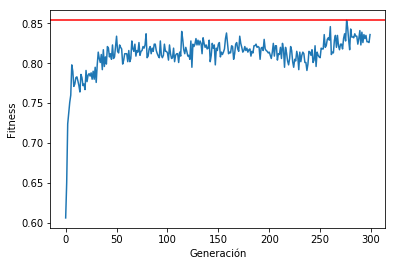

[3.0, -21.0, 1.0, -0.0, 17.0, 23.0, 5.0, 32.0, 64.0, 97.0]
0.854


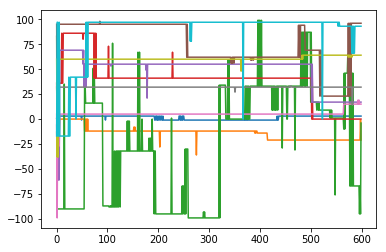

In [70]:
(fitness,progenitores,ganador_fitness,ganador_genoma) = np.load('save/genetico/log_vs_goloso_rank.npy')

plt.plot(fitness)
plt.xlabel('Generación')
plt.ylabel('Fitness')
plt.axhline(y=ganador_fitness, color='r', linestyle='-')
plt.savefig('plots/genetico/vs_goloso_rank.pdf',bbox_inches='tight')
plt.show()

print(ganador_genoma)
print(ganador_fitness)
plt.figure()


for i in range(len(progenitores[0])):
    plt.plot([genoma[i] for genoma in progenitores],label = 'id %s'%i)
    
plt.show()